In [1]:
import os
import glob
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt 

# Cleaning data

In [114]:
victor_img_df = pd.read_csv('/Users/travistang/Documents/TorchScene/data/csv/fake_merchant_tagging_combined_set_result.csv',index_col = [0])
victor_img_df = victor_img_df.query('outlet_photo_tagging!="Empty"') # Removing empty images
victor_img_df['restaurant_cart_inappropriateness_label'] = victor_img_df['prediction_score'] < 0.6
victor_img_df['victor_label_inappropriate_flag'] = victor_img_df.apply(lambda row: 1 if row['outlet_photo_tagging'] == '1' else 0, axis=1) 
# Note that outlet_photo_tagging == 1 are those that are tagged as bad by victor because they are fake. the rest are actually good labels

# get group
victor_img_df_val_set = pd.read_csv('/Users/travistang/Documents/TorchScene/result/intemediate/victor_img_tpot_df_result tpot_221109 122pm.csv')
victor_img_df = victor_img_df.merge(victor_img_df_val_set[['saudagar_id','group']], how ='left', on ='saudagar_id')
victor_img_df['group'] = victor_img_df['group'].fillna(victor_img_df['set'])

# if a saudagar_id is in validation and test, keep it in validation and drop it from test
victor_img_df = victor_img_df.sort_values('set',ascending=True).drop_duplicates(subset=['source','saudagar_id'],keep='last') 

df_prediction_result = pd.read_csv('/Users/travistang/Documents/TorchScene/result/csv/victor_set_resnet18.csv', index_col = [0])
victor_img_df = victor_img_df.merge(df_prediction_result['pred'], how='inner', left_on = 'saudagar_id', right_index=True)

# Get the validation set only so I don't get biased
victor_img_val_df = victor_img_df.query('set == "val"')

victor_img_df

,source,entity_id,saudagar_id,last_action,last_rule,last_sanction_datetime,outlet_photo_url,bank_acc_name,bank_acc_no,cnt_diff_entity_shared_bank_acc,...,victor_label_inappropriate_flag,restaurant_cart_inappropriateness_label,random,set,restaurant_store_cart_false_positive,restaurant_store_cart_false_negative,label,prediction_score,group,pred
0,data,0012s00000NXGa6AAH,G285231232,SuspendMerchantPayout,IBT-M52-009-10A,2022-07-12 9:33:43,https://api.gobiz.co.id/v1/onboardings/data/SF...,MOHAMAD RIDWAN,8.330079e+09,302.0,...,1,True,0.904060,test,0.0,0.0,NaN,0.000354,test,burial_chamber 69
2260,good_photos,NaN,G805388509,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,0,False,0.575984,test,0.0,1.0,NaN,0.999973,test,kindergarden_classroom 202
2261,good_photos,NaN,G024140195,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,0,False,0.575580,test,0.0,1.0,NaN,0.996800,test,bar 39
2262,good_photos,NaN,G268180486,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,1,False,0.688902,test,0.0,1.0,NaN,0.999392,test,outdoor 256
2268,good_photos,NaN,G290852858,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,0,False,0.916971,test,0.0,0.0,NaN,0.999991,test,ticket_booth 332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,good_photos,NaN,G318439890,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,0,False,0.333878,val,0.0,0.0,NaN,0.999969,val_train,ticket_booth 332
836,data,0012s00000L6Dq9AAF,G559142822,SuspendMerchantGoResto,IBT-M52-015A,2022-08-25 10:45:04,https://api.midtrans.com/v1/onboardings/data/S...,CHANTIKA ALWA PUTRI HEDI,2.316349e+08,4.0,...,1,False,0.269292,val,NaN,NaN,NaN,0.759632,val_train,living_room 215
2416,good_photos,NaN,G854199120,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,1,False,0.260184,val,0.0,1.0,NaN,0.992157,val_train,roof_garden 290
2417,good_photos,NaN,G028282079,NaN,NaN,NaN,https://api.gobiz.co.id/v1/onboardings/data/SF...,NaN,NaN,NaN,...,0,False,0.118239,val,0.0,1.0,NaN,0.999997,val_train,loading_dock 216


In [115]:
victor_img_df.groupby(['outlet_photo_tagging']).count()['source']

outlet_photo_tagging
0    1318
1    2031
2     623
3      10
Name: source, dtype: int64

In [116]:
victor_img_df.groupby(['group','victor_label_inappropriate_flag']).count()['source']

group      victor_label_inappropriate_flag
test       0                                   947
           1                                  1013
val_test   0                                   254
           1                                   252
val_train  0                                   750
           1                                   766
Name: source, dtype: int64

In [117]:
victor_img_df[victor_img_df['restaurant_cart_inappropriateness_label'].isna()]

,source,entity_id,saudagar_id,last_action,last_rule,last_sanction_datetime,outlet_photo_url,bank_acc_name,bank_acc_no,cnt_diff_entity_shared_bank_acc,...,victor_label_inappropriate_flag,restaurant_cart_inappropriateness_label,random,set,restaurant_store_cart_false_positive,restaurant_store_cart_false_negative,label,prediction_score,group,pred


In [118]:
victor_img_df.columns

Index(['source', 'entity_id', 'saudagar_id', 'last_action', 'last_rule',
       'last_sanction_datetime', 'outlet_photo_url', 'bank_acc_name',
       'bank_acc_no', 'cnt_diff_entity_shared_bank_acc',
       'diff_entity_id_shared_bank_acc',
       'cnt_diff_entity_outlet_shared_bank_acc',
       'diff_entity_outlet_id_shared_bank_acc', 'gofood_id', 'cnt_all_order',
       'sum_gmv_all_order', 'cnt_co', 'sum_gmv_co', 'cnt_maf_defect_order',
       'sum_gmv_maf_defect_order', 'cnt_cadf', 'sum_gmv_cadf', 'percent_co',
       'percent_good_order', 'percent_bad_order', 'photo',
       'outlet_photo_tagging', 'flag_fake_merchant',
       'victor_label_inappropriate_flag',
       'restaurant_cart_inappropriateness_label', 'random', 'set',
       'restaurant_store_cart_false_positive',
       'restaurant_store_cart_false_negative', 'label', 'prediction_score',
       'group', 'pred'],
      dtype='object')

# Get Baseline Performance 

In [119]:
print("Train Set performance")
print(classification_report(victor_img_df.query("group == 'val_train'")['victor_label_inappropriate_flag'],
                            victor_img_df.query("group == 'val_train'")['restaurant_cart_inappropriateness_label']))

print("Validation Set performance")
print(classification_report(victor_img_df.query("group == 'val_test'")['victor_label_inappropriate_flag'],
                            victor_img_df.query("group == 'val_test'")['restaurant_cart_inappropriateness_label']))


print("Test Set performance")
print(classification_report(victor_img_df.query("group == 'test'")['victor_label_inappropriate_flag'],
                            victor_img_df.query("group == 'test'")['restaurant_cart_inappropriateness_label']))


Train Set performance
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       750
           1       0.96      0.44      0.61       766

    accuracy                           0.71      1516
   macro avg       0.80      0.71      0.69      1516
weighted avg       0.80      0.71      0.69      1516

Validation Set performance
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       254
           1       0.97      0.46      0.62       252

    accuracy                           0.72       506
   macro avg       0.81      0.72      0.70       506
weighted avg       0.81      0.72      0.70       506

Test Set performance
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       947
           1       0.96      0.44      0.61      1013

    accuracy                           0.70      1960
   macro avg       0.79      0.71      0.68      1960
weig

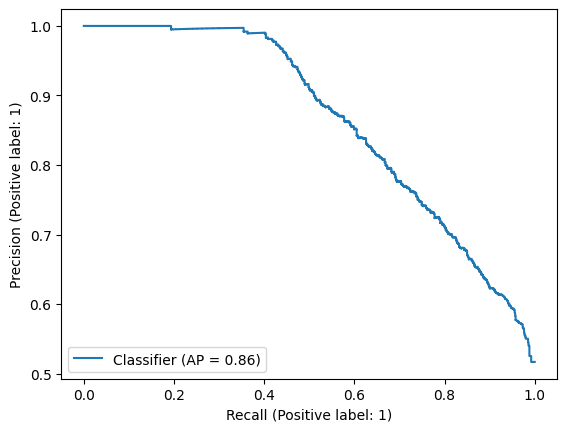

In [120]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(victor_img_df.query("group == 'test'")['victor_label_inappropriate_flag'],
                                        1- victor_img_df.query("group == 'test'")['prediction_score'])

# Exploring the Validation Set

In [121]:
# Finding categories that are highly correlated with inappropriate categories
victor_img_val_explore_str = victor_img_val_df.pivot_table(index = ['pred','restaurant_cart_inappropriateness_label'], columns = 'victor_label_inappropriate_flag', aggfunc = len)['source']

print(victor_img_val_explore_str.to_string())

victor_label_inappropriate_flag                                         0     1
pred                       restaurant_cart_inappropriateness_label             
airplane_cabin 1           False                                      1.0   NaN
alcove 3                   False                                      2.0   6.0
                           True                                       1.0   5.0
alley 4                    False                                      3.0   7.0
amusement_arcade 6         False                                     39.0   NaN
amusement_park 7           False                                      4.0   1.0
aquarium 9                 True                                       NaN   8.0
archive 14                 False                                      1.0   1.0
                           True                                       NaN   7.0
art_gallery 19             False                                      NaN   2.0
art_school 20              False        

# Using TPOT to train a decision tree classifier for the 365-length vector

In [122]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

#Creating a dataframe for tpot only
victor_img_tpot_df = victor_img_df.merge(df_prediction_result.drop(columns=['pred']), how='left', left_on = 'saudagar_id', right_index=True)
victor_img_tpot_df = victor_img_tpot_df.dropna(subset=['airfield 0']) 
victor_img_tpot_df = victor_img_tpot_df.set_index('saudagar_id')
victor_img_tpot_df = victor_img_tpot_df.query('set == "val"')

victor_img_tpot_df = victor_img_tpot_df.drop(columns = ['source', 'entity_id', 'last_action', 'last_rule',
       'last_sanction_datetime', 'outlet_photo_url', 'bank_acc_name',
       'bank_acc_no', 'cnt_diff_entity_shared_bank_acc',
       'diff_entity_id_shared_bank_acc',
       'cnt_diff_entity_outlet_shared_bank_acc',
       'diff_entity_outlet_id_shared_bank_acc', 'gofood_id', 'cnt_all_order',
       'sum_gmv_all_order', 'cnt_co', 'sum_gmv_co', 'cnt_maf_defect_order',
       'sum_gmv_maf_defect_order', 'cnt_cadf', 'sum_gmv_cadf', 'percent_co',
       'percent_good_order', 'percent_bad_order', 'photo',
       'outlet_photo_tagging', 'flag_fake_merchant', 'prediction_score',
       'restaurant_cart_inappropriateness_label',
       'random','set',
       'restaurant_store_cart_false_positive','restaurant_store_cart_false_negative','label','pred','group'])
# victor_img_tpot_df

target_col = 'victor_label_inappropriate_flag' #restaurant_store_cart_false_positive

X_train, X_test, y_train, y_test = train_test_split(victor_img_tpot_df.drop(columns=[target_col]), 
                                                    victor_img_tpot_df[target_col],
                                                    train_size=0.75, 
                                                    test_size=0.25,
                                                    random_state=42)

# Making sure this is idempotent
# victor_img_df_val_set = pd.read_csv('/Users/travistang/Documents/TorchScene/result/intemediate/victor_img_tpot_df_result tpot_221108 122pm.csv')
# X_train = victor_img_df_val_set.query('group == "val_train"').set_index('saudagar_id').drop(columns=['victor_label_inappropriate_flag','pred','group','inappropriate_prob','outlet_photo_url','prediction_score'])
# y_train = victor_img_df_val_set.query('group == "val_train"')['victor_label_inappropriate_flag']
# X_test = victor_img_df_val_set.query('group == "val_test"').set_index('saudagar_id').drop(columns=['victor_label_inappropriate_flag','pred','group','inappropriate_prob','outlet_photo_url','prediction_score'])
# y_test = victor_img_df_val_set.query('group == "val_test"')['victor_label_inappropriate_flag']

tpot_config = {
    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ["gini", "entropy", "log_loss"],
        'max_depth': [1, 10, 20, 30, 100],
        'random_state': [42],
        'min_samples_leaf': [1,2,5,10,20],
        'min_samples_split': [.25,.5,.75,2],
    }
}

# tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
#                       config_dict=tpot_config)
tpot = TPOTClassifier(generations=5, 
                      population_size=20, 
                      verbosity=2,
                      config_dict="TPOT light",
                      random_state=40)

tpot.fit(X_train, y_train)

                                                                             
Generation 1 - Current best internal CV score: 0.8944589195761681
                                                                             
Generation 2 - Current best internal CV score: 0.8944589195761681
                                                                             
Generation 3 - Current best internal CV score: 0.8951168143130103
                                                                              
Generation 4 - Current best internal CV score: 0.8951168143130103
                                                                              
Generation 5 - Current best internal CV score: 0.8951168143130103
                                                                              
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=59, p=1, weights=distance)


TPOTClassifier(config_dict='TPOT light', generations=5, population_size=20,
               random_state=40, verbosity=2)

## Training a decision tree that is recommended by 

In [126]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 49, p = 1, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49, p=1)

In [61]:
# Making predictions on inappropriateness using classifier
victor_img_tpot_df['inappropriate_prob'] = clf.predict_proba(victor_img_tpot_df.drop(columns=['victor_label_inappropriate_flag']))[:,1]
victor_img_tpot_df

,victor_label_inappropriate_flag,airfield 0,airplane_cabin 1,airport_terminal 2,alcove 3,alley 4,amphitheater 5,amusement_arcade 6,amusement_park 7,outdoor 8,...,wave 357,wet_bar 358,wheat_field 359,wind_farm 360,windmill 361,yard 362,youth_hostel 363,zen_garden 364,group,inappropriate_prob
saudagar_id,,,,,,,,,,,,,,,,,,,,,
G165718589,1,3.275215e-04,0.000002,0.000102,0.000064,0.005720,0.000535,0.000003,0.000773,0.000675,...,1.696274e-05,0.000008,1.115410e-05,7.914581e-05,2.269554e-04,0.011360,0.000001,0.002651,val_train,0.489796
G812911715,0,4.730372e-06,0.004714,0.001054,0.004122,0.002288,0.000015,0.025189,0.002374,0.000072,...,5.374962e-06,0.000656,3.293496e-05,7.853573e-06,4.815016e-06,0.002983,0.000430,0.000699,val_train,0.020408
G319685382,1,8.736711e-08,0.000019,0.000007,0.000277,0.003693,0.000013,0.000006,0.000005,0.000015,...,1.391370e-06,0.000039,4.515329e-07,1.370954e-06,8.552845e-06,0.000004,0.000033,0.000001,val_test,0.918367
G414197310,0,4.012700e-07,0.000010,0.000450,0.000002,0.000019,0.000010,0.001250,0.000707,0.000012,...,1.033296e-06,0.000021,7.044933e-07,7.137126e-07,3.715506e-06,0.000004,0.000011,0.000004,val_train,0.000000
G090997021,1,1.384769e-05,0.000029,0.000023,0.001225,0.000060,0.000072,0.000002,0.000034,0.000007,...,2.172307e-03,0.000034,2.915241e-03,2.055253e-04,9.642789e-05,0.000490,0.000048,0.015304,val_train,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G982081057,1,7.724012e-08,0.000222,0.000026,0.000477,0.007048,0.000002,0.001010,0.000010,0.000006,...,4.560652e-07,0.003499,2.078218e-06,6.268451e-07,1.802145e-07,0.000052,0.013306,0.000039,val_train,0.938776
G879287690,1,7.202941e-05,0.000003,0.000309,0.000100,0.000075,0.000122,0.000016,0.000026,0.000638,...,1.206910e-05,0.000199,4.051116e-05,3.362480e-05,1.920942e-05,0.002340,0.000042,0.000409,val_train,0.530612
G138256563,0,1.811004e-06,0.000005,0.000395,0.000083,0.000392,0.000002,0.008610,0.000244,0.000043,...,5.371730e-06,0.000107,1.738314e-05,7.227702e-06,1.131491e-05,0.000084,0.000480,0.000088,val_train,0.204082


In [78]:
# assigning group
victor_img_tpot_df['group'] = ''
victor_img_tpot_df.loc[victor_img_tpot_df.index.isin(X_train.index),'group']='val_train'
victor_img_tpot_df.loc[victor_img_tpot_df.index.isin(X_test.index),'group']='val_test'

# Merging results
victor_img_tpot_df_result = victor_img_tpot_df.merge(victor_img_df[['saudagar_id','outlet_photo_url','prediction_score','pred']], how='left', left_index=True, right_on = 'saudagar_id').set_index('saudagar_id')
victor_img_tpot_df_result.to_csv('/Users/travistang/Documents/TorchScene/result/intemediate/victor_img_tpot_df_result tpot_221109 122pm.csv')

In [63]:
victor_img_tpot_df_result

,victor_label_inappropriate_flag,airfield 0,airplane_cabin 1,airport_terminal 2,alcove 3,alley 4,amphitheater 5,amusement_arcade 6,amusement_park 7,outdoor 8,...,wheat_field 359,wind_farm 360,windmill 361,yard 362,youth_hostel 363,zen_garden 364,group,inappropriate_prob,outlet_photo_url,prediction_score
saudagar_id,,,,,,,,,,,,,,,,,,,,,
G165718589,1,3.275215e-04,0.000002,0.000102,0.000064,0.005720,0.000535,0.000003,0.000773,0.000675,...,1.115410e-05,7.914581e-05,2.269554e-04,0.011360,0.000001,0.002651,val_train,0.489796,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.999066
G812911715,0,4.730372e-06,0.004714,0.001054,0.004122,0.002288,0.000015,0.025189,0.002374,0.000072,...,3.293496e-05,7.853573e-06,4.815016e-06,0.002983,0.000430,0.000699,val_train,0.020408,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.993293
G319685382,1,8.736711e-08,0.000019,0.000007,0.000277,0.003693,0.000013,0.000006,0.000005,0.000015,...,4.515329e-07,1.370954e-06,8.552845e-06,0.000004,0.000033,0.000001,val_test,0.918367,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.999705
G414197310,0,4.012700e-07,0.000010,0.000450,0.000002,0.000019,0.000010,0.001250,0.000707,0.000012,...,7.044933e-07,7.137126e-07,3.715506e-06,0.000004,0.000011,0.000004,val_train,0.000000,https://api.gobiz.co.id/v1/onboardings/data/SF...,1.000000
G090997021,1,1.384769e-05,0.000029,0.000023,0.001225,0.000060,0.000072,0.000002,0.000034,0.000007,...,2.915241e-03,2.055253e-04,9.642789e-05,0.000490,0.000048,0.015304,val_train,1.000000,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G982081057,1,7.724012e-08,0.000222,0.000026,0.000477,0.007048,0.000002,0.001010,0.000010,0.000006,...,2.078218e-06,6.268451e-07,1.802145e-07,0.000052,0.013306,0.000039,val_train,0.938776,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.999862
G879287690,1,7.202941e-05,0.000003,0.000309,0.000100,0.000075,0.000122,0.000016,0.000026,0.000638,...,4.051116e-05,3.362480e-05,1.920942e-05,0.002340,0.000042,0.000409,val_train,0.530612,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.999988
G138256563,0,1.811004e-06,0.000005,0.000395,0.000083,0.000392,0.000002,0.008610,0.000244,0.000043,...,1.738314e-05,7.227702e-06,1.131491e-05,0.000084,0.000480,0.000088,val_train,0.204082,https://api.gobiz.co.id/v1/onboardings/data/SF...,0.983319


In [64]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.89      0.89       254
           1       0.89      0.90      0.89       252

    accuracy                           0.89       506
   macro avg       0.89      0.89      0.89       506
weighted avg       0.89      0.89      0.89       506



In [65]:
# Comparing the above performance of the classifier with that of the baseline (restaurant-cart-model)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print(classification_report(victor_img_df.loc[victor_img_df.saudagar_id.isin(X_test.index),"victor_label_inappropriate_flag"],
                            victor_img_df.loc[victor_img_df.saudagar_id.isin(X_test.index),"prediction_score"]<0.6))


# victor_img_tpot_df.loc[victor_img_tpot_df.index.isin(X_train.index),'group']='val_train'
# victor_img_tpot_df.loc[victor_img_tpot_df.index.isin(X_test.index),'group']='val_test'

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       254
           1       0.97      0.46      0.62       252

    accuracy                           0.72       506
   macro avg       0.81      0.72      0.70       506
weighted avg       0.81      0.72      0.70       506



In [74]:
# clf.predict_proba(X_test)[:,1] > 0.5
# If we puzh the threshold to be 95%, then we can make sure that the precision is a whopping 98%. That is great.
print(classification_report(y_test, y_score > 0.75))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       254
           1       0.97      0.76      0.85       252

    accuracy                           0.87       506
   macro avg       0.89      0.87      0.87       506
weighted avg       0.89      0.87      0.87       506



In [75]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
precision, recall, thresholds

(array([0.49802372, 0.55777778, 0.60933661, 0.64490862, 0.69318182,
        0.70760234, 0.72238806, 0.73700306, 0.76282051, 0.76298701,
        0.76547231, 0.7781457 , 0.79322034, 0.8       , 0.80276817,
        0.81690141, 0.82562278, 0.83453237, 0.84      , 0.84926471,
        0.85873606, 0.8619403 , 0.87121212, 0.8740458 , 0.88372093,
        0.88671875, 0.88932806, 0.888     , 0.89473684, 0.89754098,
        0.90794979, 0.92608696, 0.93362832, 0.93273543, 0.94954128,
        0.96153846, 0.96078431, 0.9744898 , 0.97777778, 0.98159509,
        0.98113208, 0.98684211, 0.99280576, 0.99236641, 0.99159664,
        0.99090909, 0.98901099, 0.98780488, 0.98684211, 0.98611111,
        1.        ]),
 array([1.        , 0.99603175, 0.98412698, 0.98015873, 0.96825397,
        0.96031746, 0.96031746, 0.95634921, 0.94444444, 0.93253968,
        0.93253968, 0.93253968, 0.92857143, 0.92063492, 0.92063492,
        0.92063492, 0.92063492, 0.92063492, 0.91666667, 0.91666667,
        0.91666667, 0.9166

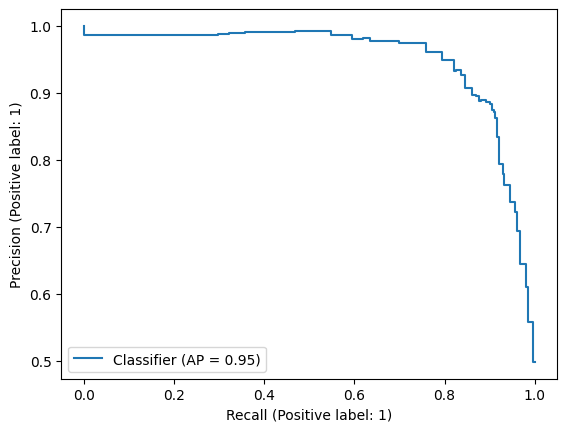

In [76]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, y_score)

# Evaluating the model on test set

In [104]:
df_test = victor_img_df.merge(df_prediction_result.drop(columns=['pred']), how='left', left_on = 'saudagar_id', right_index=True)
df_test = df_test.query('set == "test"')
df_test = df_test.dropna(subset=['airfield 0']) 
df_test = df_test.set_index('saudagar_id')

df_test = df_test.drop(columns = ['source', 'entity_id', 'last_action', 'last_rule',
       'last_sanction_datetime', 'outlet_photo_url', 'bank_acc_name',
       'bank_acc_no', 'cnt_diff_entity_shared_bank_acc',
       'diff_entity_id_shared_bank_acc',
       'cnt_diff_entity_outlet_shared_bank_acc',
       'diff_entity_outlet_id_shared_bank_acc', 'gofood_id', 'cnt_all_order',
       'sum_gmv_all_order', 'cnt_co', 'sum_gmv_co', 'cnt_maf_defect_order',
       'sum_gmv_maf_defect_order', 'cnt_cadf', 'sum_gmv_cadf', 'percent_co',
       'percent_good_order', 'percent_bad_order', 'photo',
       'outlet_photo_tagging', 'flag_fake_merchant', 'prediction_score',
       'restaurant_cart_inappropriateness_label',
       'random','set',
       'restaurant_store_cart_false_positive','restaurant_store_cart_false_negative','label','pred','set','group'])

target_col = 'victor_label_inappropriate_flag'

from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = clf.predict(df_test.drop(target_col,axis=1))
y_score = clf.predict_proba(df_test.drop(target_col,axis=1))[:,1]
print("Classification report when threshold is 0.5")
print(classification_report(df_test[target_col],y_pred))

print("Classification report when threshold is 0.75")
print(classification_report(df_test[target_col],y_score > 0.7))


Classification report when threshold is 0.5
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       947
           1       0.90      0.87      0.89      1013

    accuracy                           0.89      1960
   macro avg       0.89      0.89      0.89      1960
weighted avg       0.89      0.89      0.89      1960

Classification report when threshold is 0.75
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       947
           1       0.96      0.73      0.83      1013

    accuracy                           0.84      1960
   macro avg       0.86      0.85      0.84      1960
weighted avg       0.87      0.84      0.84      1960



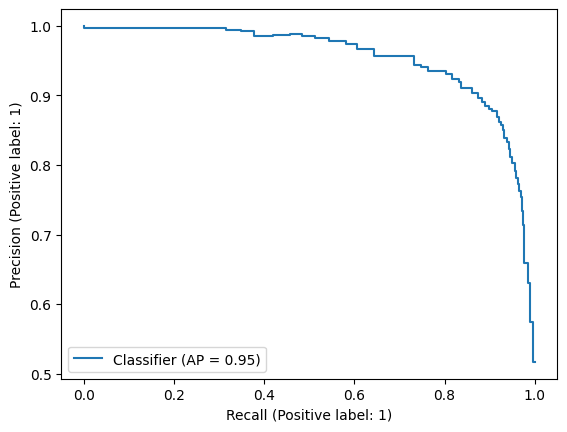

In [106]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(df_test[target_col],y_score)

In [77]:
from sklearn import tree
print(tree.export_text(clf))

AttributeError: 'KNeighborsClassifier' object has no attribute 'tree_'

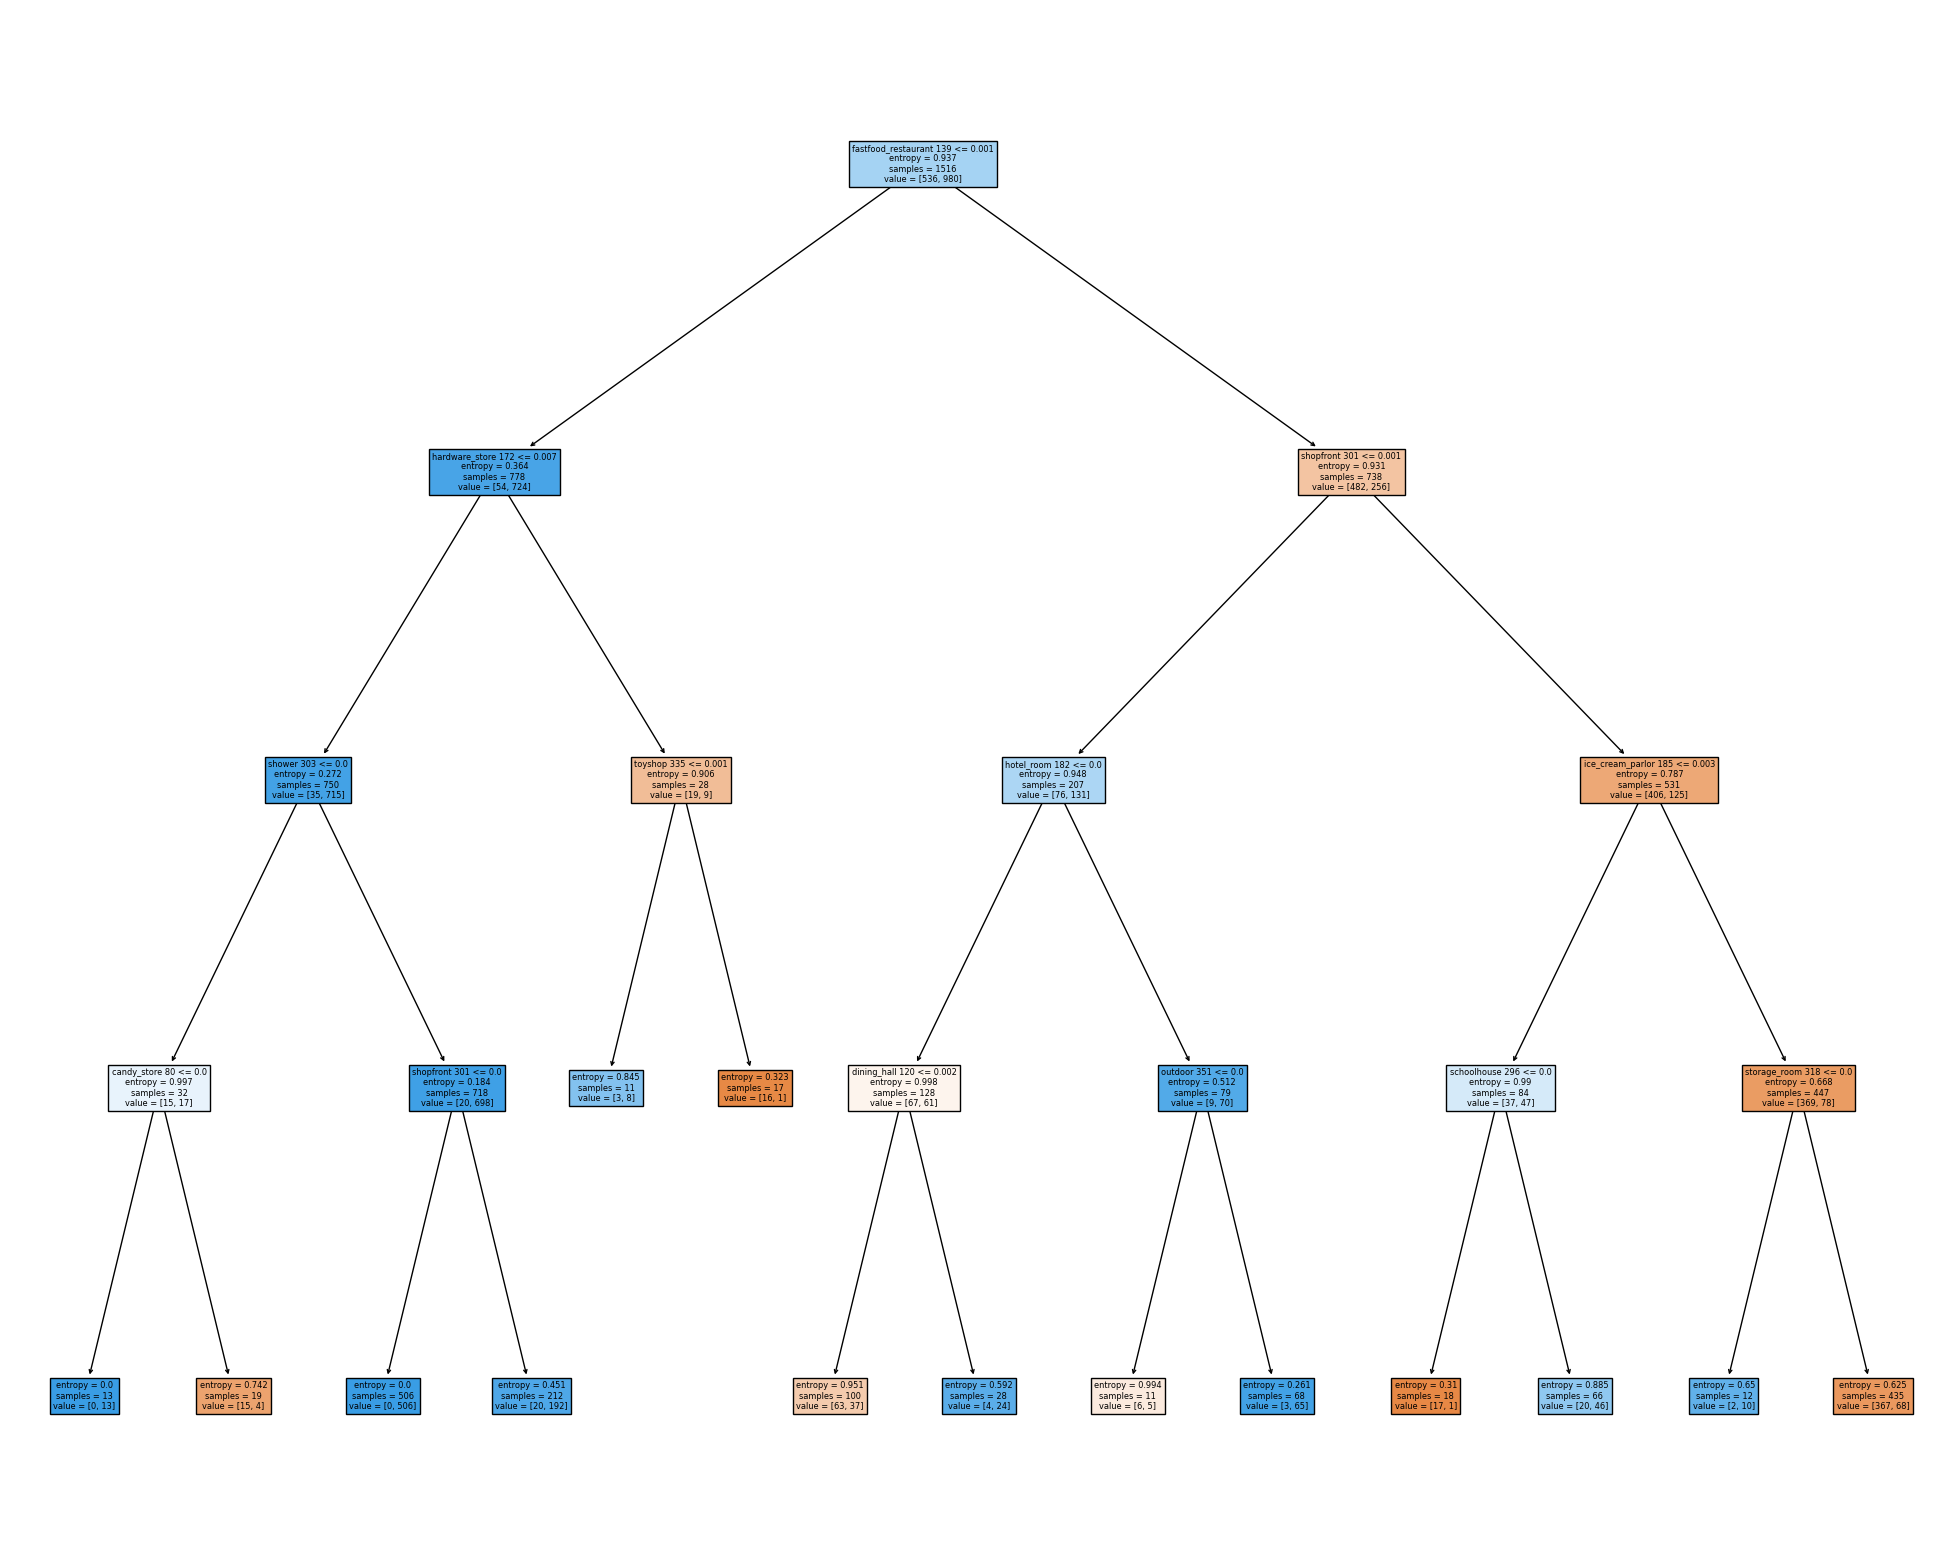

In [99]:
scene_list = []
with open('/Users/travistang/Documents/TorchScene/categories_places365.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        scene_list.append(line.split('/')[-1].split('\n')[0])
        
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=scene_list,  
                #    class_names=iris.target_names,
                   filled=True)

<AxesSubplot: >

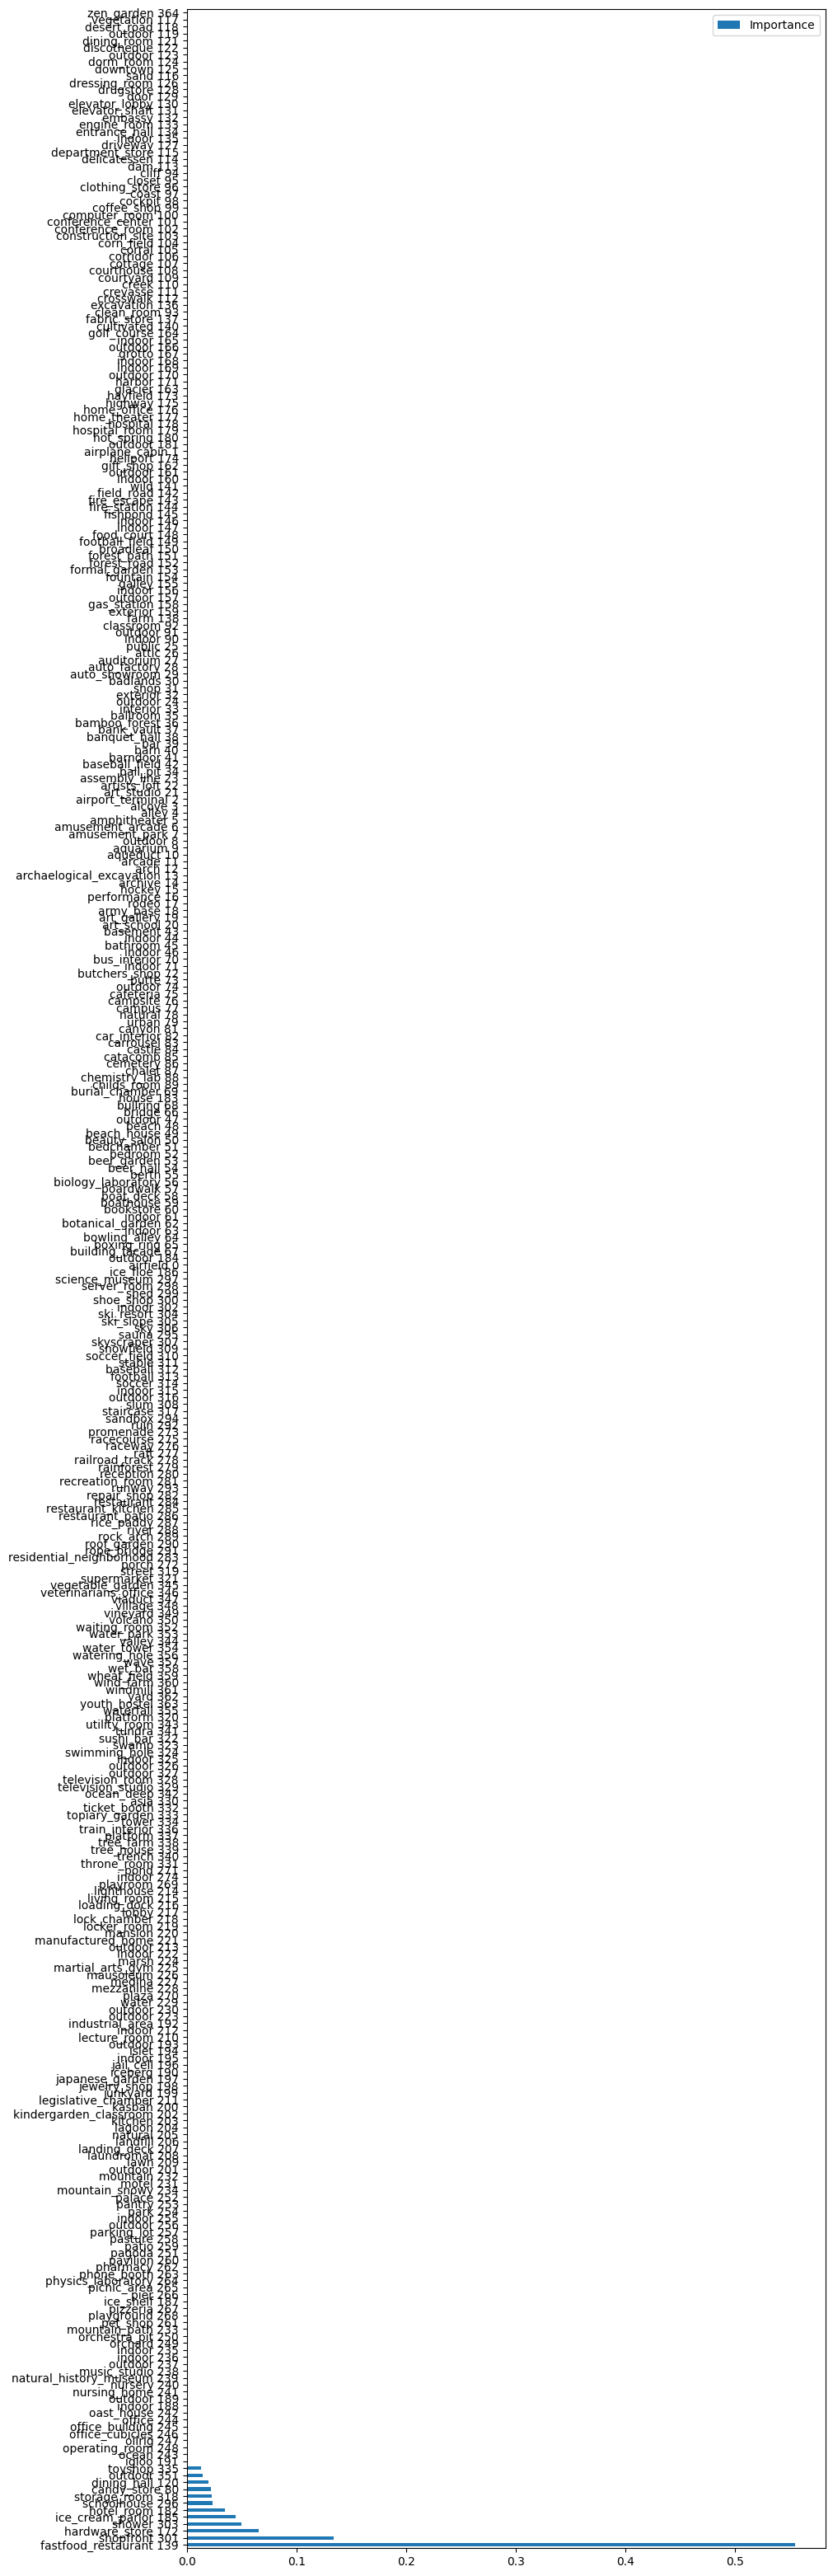

In [100]:
feat_importances = pd.DataFrame(clf.feature_importances_, index=scene_list, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(10,40))

In [101]:
print(tpot.score(X_test, y_test))
tpot.export('../tpot/tpot_221109 122pm.py')

0.8063241106719368


/Users/travistang/opt/anaconda3/envs/torch-scene/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


# Make predictions on oct2022-gooddata

In [132]:
# Making predictions on inappropriateness using classifier

df_prediction_result_oct2022_gooddata = pd.read_csv('/Users/travistang/Documents/TorchScene/result/intermediate/resnet18/oct2022_gooddata_resnet18.csv',index_col = [0])
df_prediction_result_oct2022_gooddata['inappropriate_prob_tpot_221109'] = clf.predict_proba(df_prediction_result_oct2022_gooddata)[:,1]
df_prediction_result_oct2022_gooddata['inappropriate_prob_tpot_221109'].to_csv('/Users/travistang/Documents/TorchScene/result/intermediate/tpot_221109 122pm/df_prediction_result_oct2022_gooddata.csv')

In [134]:
# Making predictions on inappropriateness using classifier
df_prediction_result_oct2022_baddata = pd.read_csv('/Users/travistang/Documents/TorchScene/result/intermediate/resnet18/oct2022_baddata_resnet18.csv',index_col = [0])
df_prediction_result_oct2022_baddata['inappropriate_prob_tpot_221109'] = clf.predict_proba(df_prediction_result_oct2022_baddata)[:,1]
df_prediction_result_oct2022_baddata['inappropriate_prob_tpot_221109'].to_csv('/Users/travistang/Documents/TorchScene/result/intermediate/tpot_221109 122pm/df_prediction_result_oct2022_baddata.csv')